In [1]:
import libs.local
import matplotlib.pyplot
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import xarray

In [2]:
experiment = 'ssp585'
key = 'Ensemble mean'
seasons = ['DJF', 'MAM', 'JJA', 'SON']
region = 'Central'

kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': '_delta_1980-2010'
}
siconc = libs.local.get_ensemble_series('siconc', **kwargs)[key] / 1e6
tas = libs.local.get_ensemble_series('tas', **kwargs)[key]
evspsbl = libs.local.get_ensemble_series('evspsbl', **kwargs)[key]
pr = libs.local.get_ensemble_series('pr', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn', **kwargs)[key]


def filter_season_plot(period, siconc, tas, pr, prra, prsn, title=''):
    siconc = siconc.where(siconc.time['time.season'] == period)
    tas = tas.where(tas.time['time.season'] == period)
    pr = pr.where(pr.time['time.season'] == period)
    prra = prra.where(prra.time['time.season'] == period)
    prsn = prsn.where(prsn.time['time.season'] == period)
    
    plot(siconc, tas, pr, prra, prsn, title)

    
def plot(siconc, tas, pr, prra, prsn, title=''):
    fig, axs = matplotlib.pyplot.subplots(2, 5, figsize=(12,6))
    axs = axs.flatten()
    axs[0].scatter(siconc, tas); axs[0].set_xlabel('siconc'); axs[0].set_ylabel('tas')
    axs[1].scatter(siconc, prsn); axs[1].set_xlabel('siconc'); axs[1].set_ylabel('prsn')
    axs[2].scatter(siconc, prra); axs[2].set_xlabel('siconc'); axs[2].set_ylabel('prra')
    axs[3].scatter(siconc, pr); axs[3].set_xlabel('siconc'); axs[3].set_ylabel('pr')
    axs[4].scatter(siconc, evspsbl); axs[4].set_xlabel('siconc'); axs[4].set_ylabel('evspsbl')

    axs[6].scatter(tas, prsn); axs[6].set_xlabel('tas'); axs[6].set_ylabel('prsn')
    axs[7].scatter(tas, prra); axs[7].set_xlabel('tas'); axs[7].set_ylabel('prra')
    axs[8].scatter(tas, pr); axs[8].set_xlabel('tas'); axs[8].set_ylabel('pr')
    axs[9].scatter(tas, evspsbl); axs[9].set_xlabel('tas'); axs[9].set_ylabel('evspsbl')

    fig.suptitle(title)
    fig.tight_layout()


'''tas_abs = libs.local.get_ensemble_series('tas', **kwargs)[key]
mask = tas_abs > 0
siconc = siconc.where(mask)
tas = tas.where(mask)
pr = pr.where(mask)
prra = prra.where(mask)
prsn = prsn.where(mask)''';

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 siconc   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     5170.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        08:54:36   Log-Likelihood:                -537.61
No. Observations:                1452   AIC:                             1081.
Df Residuals:                    1449   BIC:                             1097.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0378      0.013     -2.967      0.003      -0.063      -0.013
tas           -0.0445      0.001    -37.198      0.000      -0.047      -0.042
prra          -2.1331      0.028    -75.879      0.000      -2.188      -2.078
==============================================================================
Omnibus:                      180.701   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.254
Skew:                          -0.609   Prob(JB):                    1.83e-128
Kurtosis:                       5.870   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

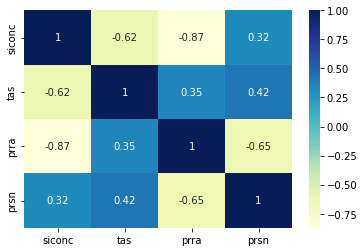

In [3]:
data = pd.DataFrame({
    'siconc': siconc.data,
    'tas': tas.data,
    'prra': prra.data,
    'prsn': prsn.data
})
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

model = smf.ols(formula="siconc ~ tas + prra", data=data).fit()
model.summary()

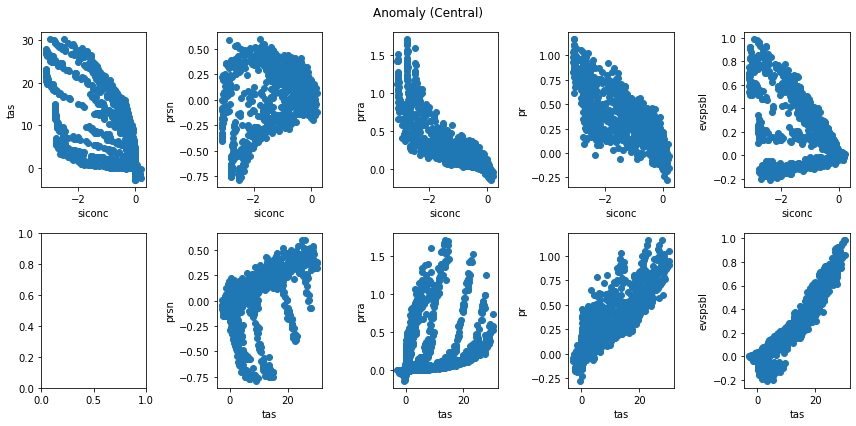

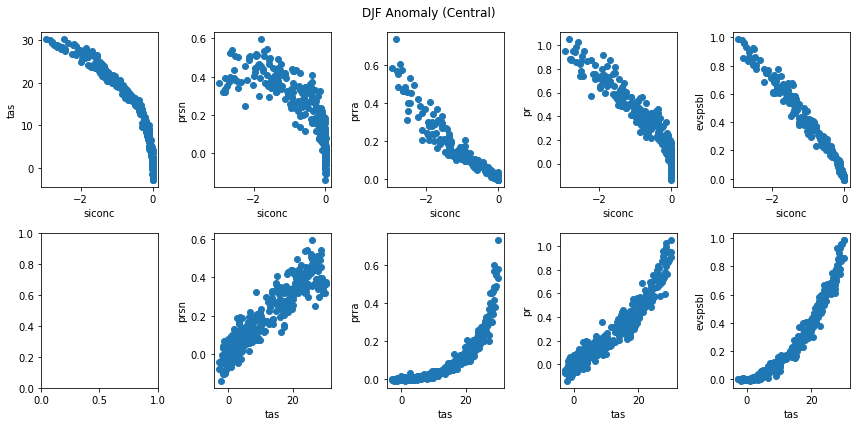

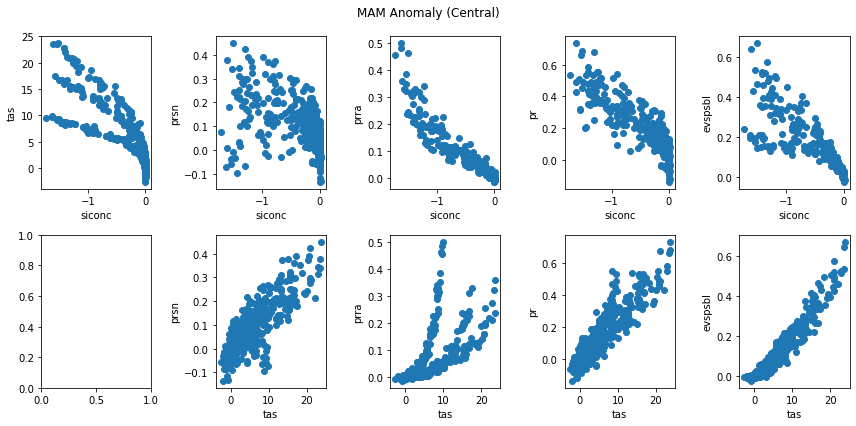

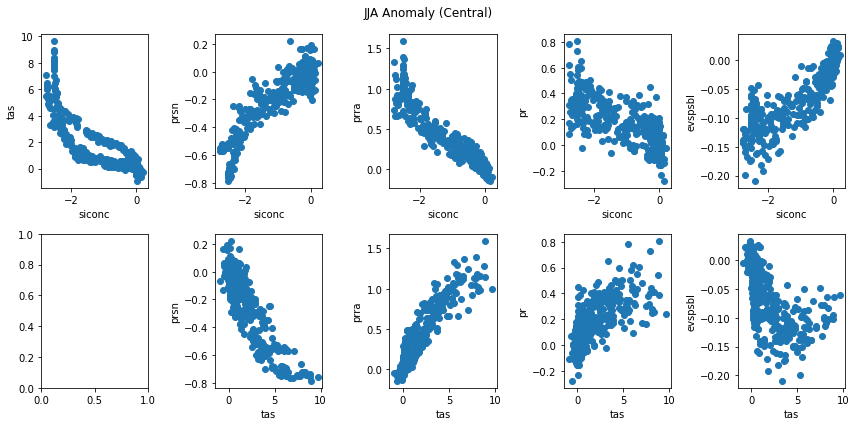

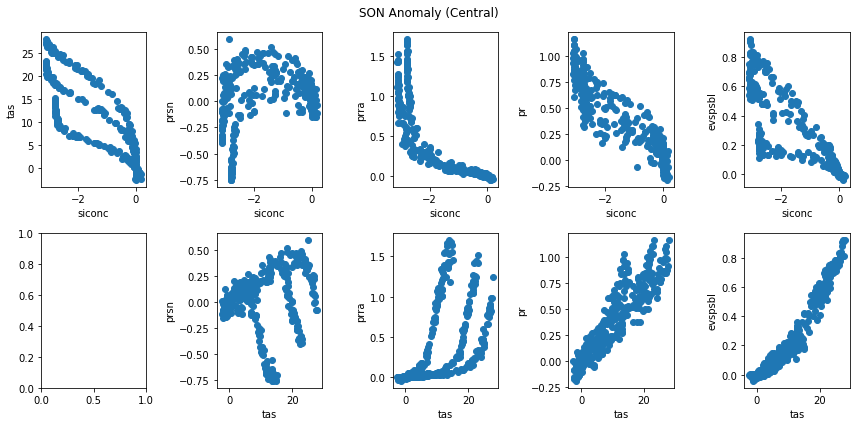

In [4]:
plot(siconc, tas, pr, prra, prsn, title=f'Anomaly ({region})')

[filter_season_plot(s, siconc, tas, pr, prra, prsn, title=f'{s} Anomaly ({region})') for s in seasons];

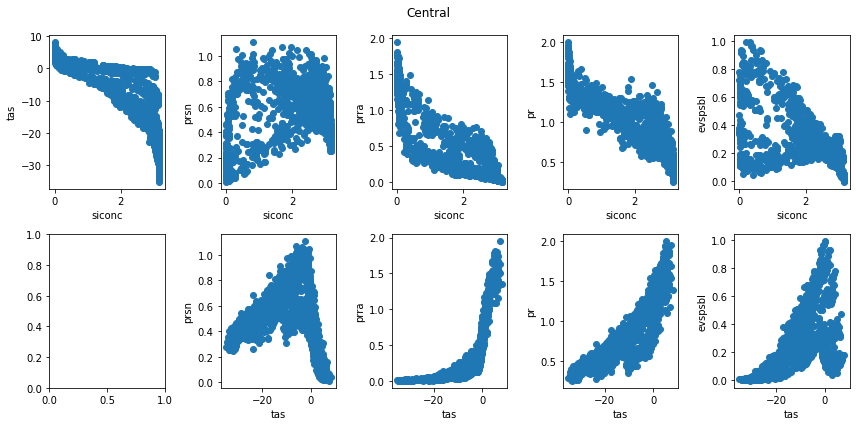

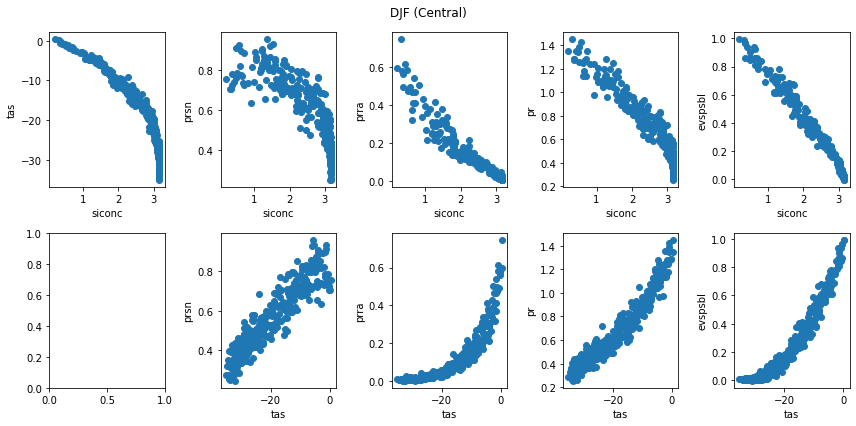

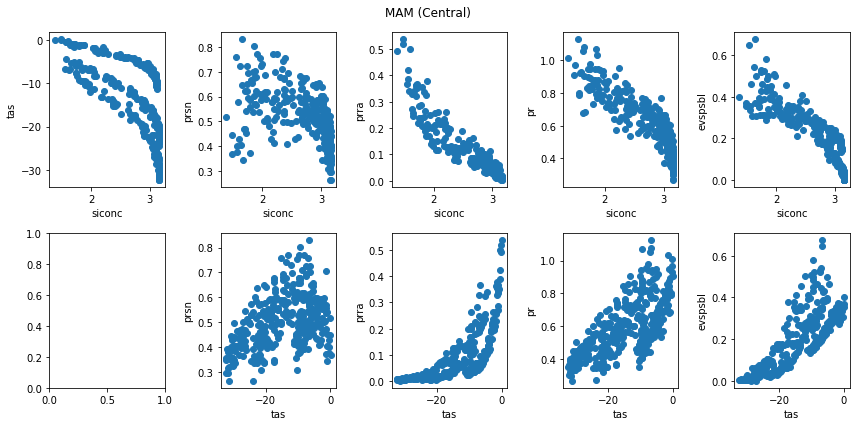

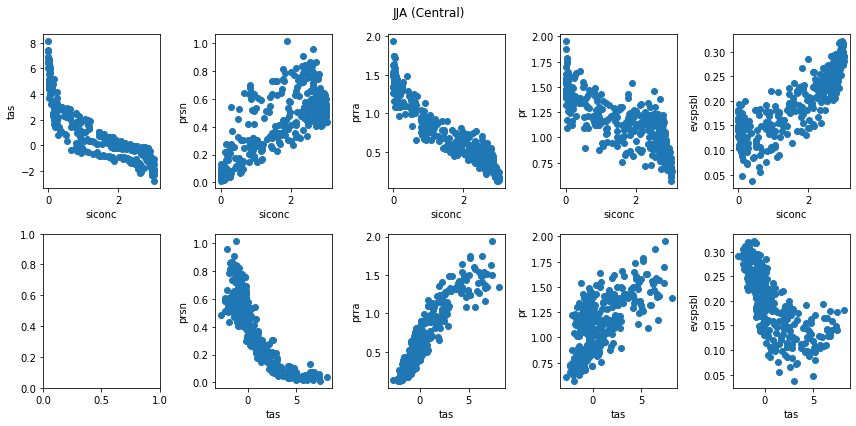

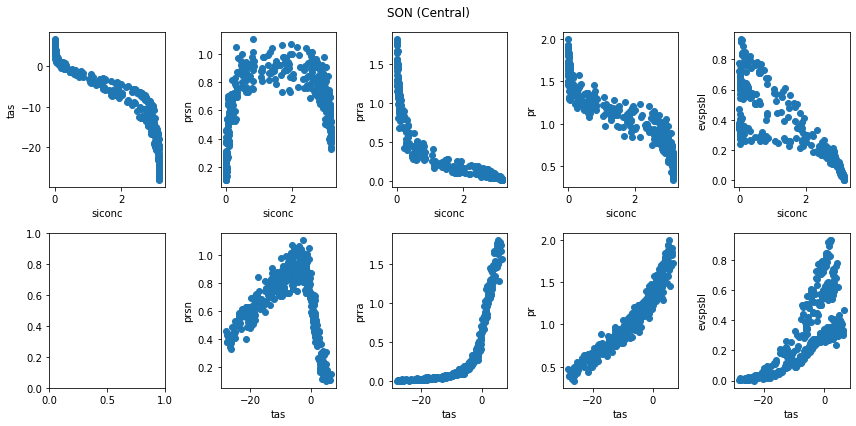

In [5]:
kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': ''
}
siconc = libs.local.get_ensemble_series('siconc', **kwargs)[key] / 1e6
tas = libs.local.get_ensemble_series('tas', **kwargs)[key]
evspsbl = libs.local.get_ensemble_series('evspsbl', **kwargs)[key]
pr = libs.local.get_ensemble_series('pr', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn', **kwargs)[key]

plot(siconc, tas, pr, prra, prsn, title=region)

[filter_season_plot(s, siconc, tas, pr, prra, prsn, title=f'{s} ({region})') for s in seasons];

In [6]:
data = pd.DataFrame({
    'siconc': siconc.data,
    'tas': tas.data,
    'prra': prra.data,
    'prsn': prsn.data
})

In [7]:
model = smf.ols(formula="siconc ~ tas + prra", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 siconc   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2448.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        08:54:47   Log-Likelihood:                -1089.5
No. Observations:                1452   AIC:                             2185.
Df Residuals:                    1449   BIC:                             2201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5355      0.034     75.265      0.000       2.469       2.602
tas           -0.0216      0.002    -12.567      0.000      -0.025      -0.018
prra          -1.7989      0.047    -38.108      0.000      -1.892      -1.706
==============================================================================
Omnibus:                       67.203   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.835
Skew:                          -0.501   Prob(JB):                     7.61e-18
Kurtosis:                       3.548   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model = smf.ols(formula="siconc ~ tas + prra + prsn", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 siconc   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     2321.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        08:54:47   Log-Likelihood:                -884.34
No. Observations:                1452   AIC:                             1777.
Df Residuals:                    1448   BIC:                             1798.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9924      0.073     54.612      0.000       3.849       4.136
tas            0.0038      0.002      2.016      0.044       0.000       0.008
prra          -2.6841      0.058    -46.458      0.000      -2.797      -2.571
prsn          -1.6865      0.078    -21.746      0.000      -1.839      -1.534
==============================================================================
Omnibus:                       21.171   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.493
Skew:                           0.175   Prob(JB):                     6.50e-07
Kurtosis:                       3.590   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

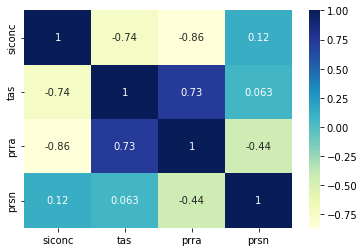

In [9]:
import seaborn as sns

sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)